# WHO data for year 2020

Now we analyze data from all over the world in the year 2020, which is also the year in which the pandemic began. As before, we will exploit the k-means clustering and the hierarchical clustering.

In [1]:
%%capture
%run setup.ipynb
%run PR5_gitlab.ipynb

## Code description


We filterred the dataframe clean by the dates '2021-01-01' and '2021-12-31' and assigns the resulting dataframe to the variable pt.

Then we calculated the difference in cumulative cases and cumulative deaths between consecutive rows in the dataframe using the  `diff()` method and assigns the resulting Series to variables dc and dd, respectively. 

We then filterred the dataframe pt for the date '2021-12-31' and assigns the resulting dataframe to the variable po. Dropped the columns 'Country_code','New_cases','New_deaths' from po using the drop() method.

After changing the datatype of column 'Population' to int. We calculated cases per capita and death per capita by dividing Period_cases and Period_deaths by Population and multiplying by 100000 respectively.


In [2]:
data_2020=clean[clean['Date_reported']=='2020-12-31']
data_2020=pd.DataFrame(data_2020)
data_2020=data_2020.drop(columns=['Country_code','New_cases','New_deaths',], axis=1)
data_2020['Population']=data_2020['Population'].astype(int)
data_2020['Cases_per_Capita']=(data_2020['Cumulative_cases'].div(data_2020['Population']))*100000
data_2020['Death_per_Capita']=(data_2020['Cumulative_deaths'].div(data_2020['Population']))*100000
print(data_2020.shape)
data_2020.head()

(172, 8)


,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Cases_per_Capita,Death_per_Capita
363,2020-12-31,Afghanistan,EMRO,52330,2189,38041754,137.559378,5.754204
1431,2020-12-31,Albania,EURO,57727,1174,2854191,2022.534582,41.132496
2499,2020-12-31,Algeria,AFRO,99311,2751,43053054,230.671209,6.389791
3567,2020-12-31,Andorra,EURO,7983,84,77142,10348.448316,108.890099
4635,2020-12-31,Angola,AFRO,17433,405,31825295,54.777183,1.272573


In [3]:
 dg.to_csv(f'{RESULTS_PATH}/dati_2020.csv')

### Analyzing of data
We created a scatter plot using the seaborn library (sns) to show the relationship between cases per capita and death per capita for different WHO regions. The x-axis represents the cases per capita and the y-axis represents the death per capita.

The `corr2()` function calculates the correlation between all parameters columns in the 'po' DataFrame, and the name of the correlation matrix is passed as the first argument.

The `SSE_plot()` function creates a plot of the sum of squared errors for different numbers of clusters for k-means clustering, using the 'Cases_per_Capita' and 'Death_per_Capita' columns from the 'po' DataFrame as the variables to be clustered, the third argument is the name of the plot. Using this graph is it possible to choose a more efficient parameter k for the number of cluster by looking at the flattering of the function.


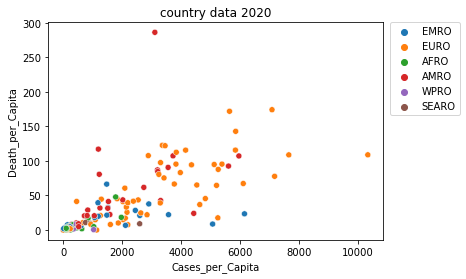

In [4]:
sns.scatterplot(x = data_2020['Cases_per_Capita'], y = data_2020['Death_per_Capita'], data=data_2020, hue='WHO_region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('country data 2020')
plt.savefig(f'{FIGURES_PATH}/data_2020_1',dpi=300)

,Cumulative_cases,Cumulative_deaths,Population,Cases_per_Capita,Death_per_Capita
Cumulative_cases,1.000000,0.934620,0.448929,0.219076,0.258683
Cumulative_deaths,0.934620,1.000000,0.381838,0.228683,0.410832
Population,0.448929,0.381838,1.000000,-0.078822,-0.032623
Cases_per_Capita,0.219076,0.228683,-0.078822,1.000000,0.735752
Death_per_Capita,0.258683,0.410832,-0.032623,0.735752,1.000000


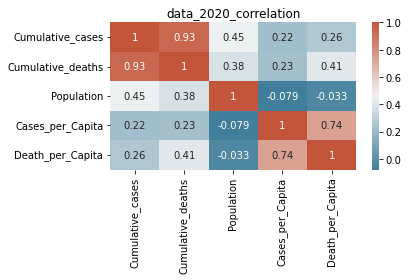

In [5]:
 corr2(data_2020,'data_2020_correlation')

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Cases_per_Capita,Death_per_Capita
363,2020-12-31,Afghanistan,EMRO,52330,2189,38041754,137.559378,5.754204
1431,2020-12-31,Albania,EURO,57727,1174,2854191,2022.534582,41.132496
2499,2020-12-31,Algeria,AFRO,99311,2751,43053054,230.671209,6.389791
3567,2020-12-31,Andorra,EURO,7983,84,77142,10348.448316,108.890099
4635,2020-12-31,Angola,AFRO,17433,405,31825295,54.777183,1.272573
...,...,...,...,...,...,...,...,...
179787,2020-12-31,Uruguay,AMRO,17962,168,3461734,518.872912,4.853059
180855,2020-12-31,Uzbekistan,EURO,77060,614,33580650,229.477392,1.828434
181923,2020-12-31,Yemen,EMRO,2101,611,29161922,7.204601,2.095198
182991,2020-12-31,Zambia,AFRO,20462,386,17861030,114.562262,2.161130


execution time = 33.739519119262695


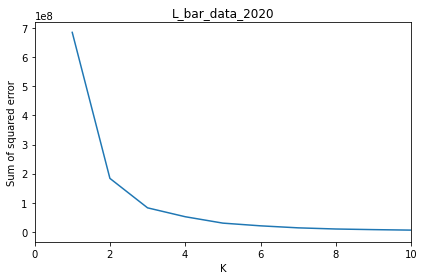

In [6]:
 SSE_plot(data_2020,'Cases_per_Capita','Death_per_Capita','L_bar_data_2020')

### Clustering analysis 

The code calls two functions, `k_means()` and `tree()`, to perform cluster analysis on the cleaned COVID-19 case data stored in the 'wo' DataFrame.

The `k_means()` function performs k-means clustering on the 'Cases_per_Capita' and 'Death_per_Capita' columns of the 'wo' DataFrame, using 4 clusters, number decided by looking at the SSE plot, this is  a higher number respect to the previous analysis on South East Asia.

The `tree()` function performs hierarchical clustering on the 'po' DataFrame, using the linkage method, a method of grouping similar data points into clusters by building a hierarchy of clusters. 


,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Cases_per_Capita,Death_per_Capita,cluster
363,2020-12-31,Afghanistan,EMRO,52330,2189,38041754,0.013293,0.020101,0
1431,2020-12-31,Albania,EURO,57727,1174,2854191,0.195443,0.143687,3
2499,2020-12-31,Algeria,AFRO,99311,2751,43053054,0.022290,0.022321,0
3567,2020-12-31,Andorra,EURO,7983,84,77142,1.000000,0.380382,2
4635,2020-12-31,Angola,AFRO,17433,405,31825295,0.005293,0.004445,0
...,...,...,...,...,...,...,...,...,...
179787,2020-12-31,Uruguay,AMRO,17962,168,3461734,0.050140,0.016953,0
180855,2020-12-31,Uzbekistan,EURO,77060,614,33580650,0.022175,0.006387,0
181923,2020-12-31,Yemen,EMRO,2101,611,29161922,0.000696,0.007319,0
182991,2020-12-31,Zambia,AFRO,20462,386,17861030,0.011070,0.007549,0


execution time = 0.07276201248168945


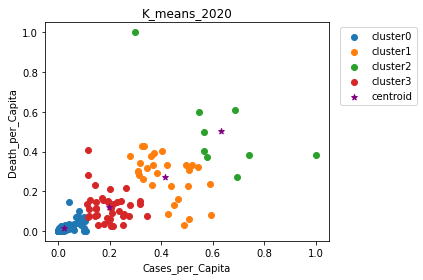

In [7]:
 k_means(4,data_2020,'Cases_per_Capita','Death_per_Capita','K_means_2020')

execution time = 0.0348820686340332


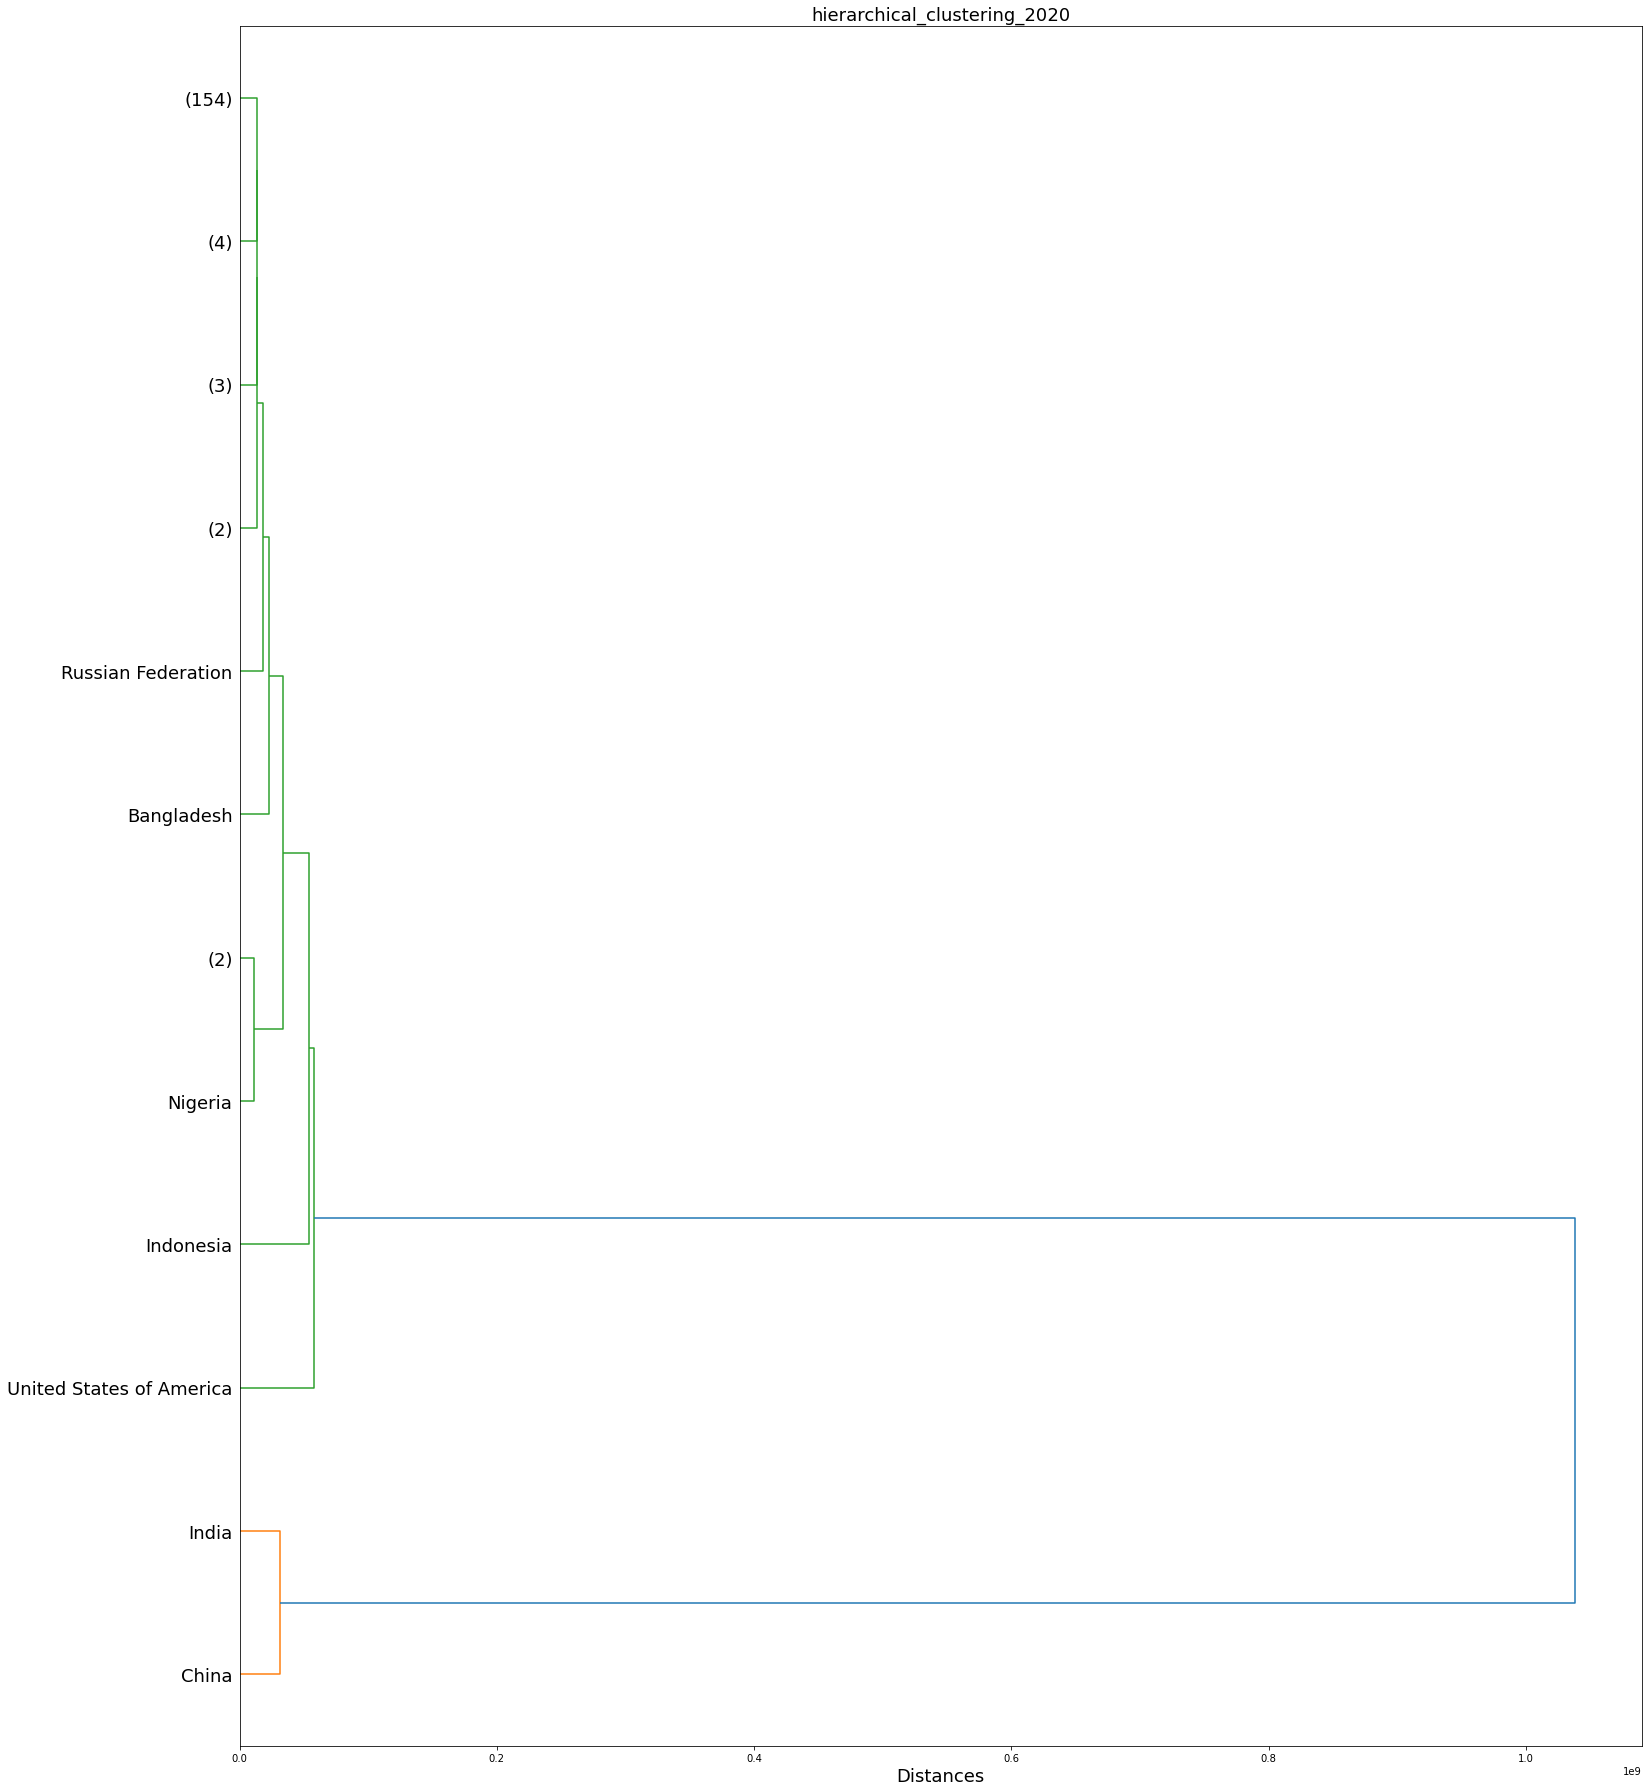

In [8]:
tree(data_2020,23,25,18,'hierarchical_clustering_2020')

### World map

This code is using the folium library to create an interactive map and plot data points on it.

Then, it uses a for loop with the zip function to iterate through the latitude, longitude, country name, cumulative cases, cumulative deaths and population of the dataframe 'C'

It creates a CircleMarker for each iteration of the loop and adds it to the map object. The CircleMarker is created at the latitude and longitude coordinates, with a radius of 5, and a popup label that shows the country name.

It also creates a marker cluster and adds it to the map. Each marker in the cluster is created at the latitude and longitude coordinates, and has a popup with the country name, cumulative cases, cumulative deaths and population.

The map object is then displayed, with the markers and marker cluster plotted on it.

It creates a map showing the location of the countries and the cumulative cases, cumulative deaths and population of each country.

In [9]:
data_map2020=merge2[merge2['Date_reported']=='2020-12-31']

map_world(data_map2020, 'map_geotagged2020.html')